In [1]:
import numpy as np
from sklearn.linear_model import Ridge
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact
from sklearn.preprocessing import PolynomialFeatures

import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [3]:
np.random.seed(42)

X_train = np.linspace(0, 2 * np.pi, 5).reshape(-1, 1)
X_plot = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
y_train = np.sin(X_train) + np.random.normal(size=5, loc=0, scale=0.3).reshape(-1, 1)
y_plot = np.sin(X_plot)

<IPython.core.display.Javascript object>


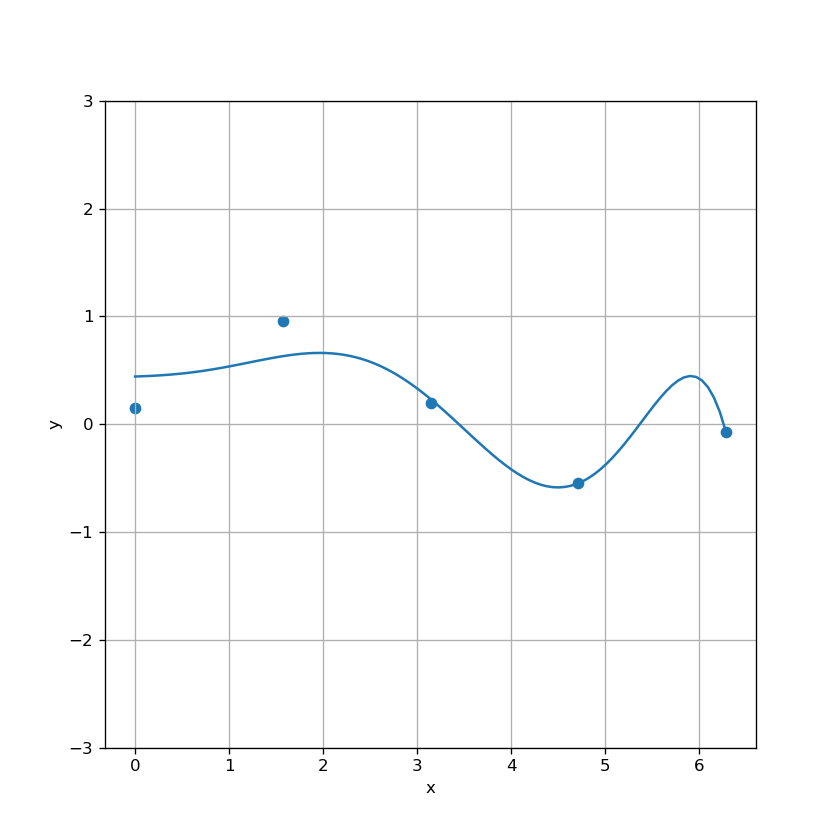

interactive(children=(IntSlider(value=0, description='c'), Output()), _dom_classes=('widget-interact',))

<function __main__.update(c)>

In [4]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(X_train, y_train)
line, = ax.plot(X_plot, y_plot)
aspace = np.logspace(-3, 10, 101)
ax.set_ylim(-3, 3)

poly = PolynomialFeatures(7)
poly.fit(X_train)
X_trans = poly.transform(X_train)
X_plot_trans = poly.transform(X_plot)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

def update(c):
    r = aspace[c]

    lr = Ridge(alpha=r)
    lr.fit(X_trans, y_train)


    line.set_ydata(lr.predict(X_plot_trans))
    
    fig.canvas.draw_idle()

interact(update, c=widgets.IntSlider(min=0,max=100,step=1,value=0))